<a href="https://colab.research.google.com/github/Rishi838/code-freak/blob/main/%20Machine%20Learning%20/%20course%20/tut1.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [58]:
!mkdir -p ~/.kaggle
!cp kaggle.json ~/.kaggle

In [59]:
!kaggle datasets download -d tejashvi14/engineering-placements-prediction

engineering-placements-prediction.zip: Skipping, found more recently modified local copy (use --force to force download)


In [60]:
import zipfile
zip_ref=zipfile.ZipFile('engineering-placements-prediction.zip','r')
zip_ref.extractall('/content')
zip_ref.close()

In [61]:
import pandas as  pd

In [62]:
df=pd.read_csv("collegePlace.csv")
df

,Age,Gender,Stream,Internships,CGPA,Hostel,HistoryOfBacklogs,PlacedOrNot
0,22,Male,Electronics And Communication,1,8,1,1,1
1,21,Female,Computer Science,0,7,1,1,1
2,22,Female,Information Technology,1,6,0,0,1
3,21,Male,Information Technology,0,8,0,1,1
4,22,Male,Mechanical,0,8,1,0,1
...,...,...,...,...,...,...,...,...
2961,23,Male,Information Technology,0,7,0,0,0
2962,23,Male,Mechanical,1,7,1,0,0
2963,22,Male,Information Technology,1,7,0,0,0
2964,22,Male,Computer Science,1,7,0,0,0


In [63]:
df=df.drop('Age',axis=1)
df=df.drop('Gender',axis=1)
df=df.drop('Stream',axis=1)
df=df.drop('Hostel',axis=1)
df=df.drop('HistoryOfBacklogs',axis=1)

In [64]:
df

,Internships,CGPA,PlacedOrNot
0,1,8,1
1,0,7,1
2,1,6,1
3,0,8,1
4,0,8,1
...,...,...,...
2961,0,7,0
2962,1,7,0
2963,1,7,0
2964,1,7,0


In [65]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2966 entries, 0 to 2965
Data columns (total 3 columns):
 #   Column       Non-Null Count  Dtype
---  ------       --------------  -----
 0   Internships  2966 non-null   int64
 1   CGPA         2966 non-null   int64
 2   PlacedOrNot  2966 non-null   int64
dtypes: int64(3)
memory usage: 69.6 KB


In [66]:
import matplotlib.pyplot as plt

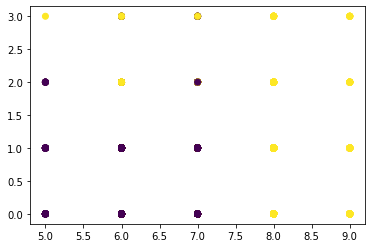

In [67]:
plt.scatter(df['CGPA'],df['Internships'],c=df['PlacedOrNot'])

In [68]:
X=df.iloc[:,[0,1]]
y=df.iloc[:,-1]

In [69]:
X

,Internships,CGPA
0,1,8
1,0,7
2,1,6
3,0,8
4,0,8
...,...,...
2961,0,7
2962,1,7
2963,1,7
2964,1,7


In [70]:
y

0       1
1       1
2       1
3       1
4       1
       ..
2961    0
2962    0
2963    0
2964    0
2965    1
Name: PlacedOrNot, Length: 2966, dtype: int64

In [71]:
from sklearn.model_selection import train_test_split

In [72]:
X_train,X_test,Y_train,Y_test=train_test_split(X,y,test_size=0.2)

In [73]:
X_train

,Internships,CGPA
2956,0,8
290,0,7
2410,0,8
2145,0,9
762,1,6
...,...,...
1391,1,7
1130,1,8
574,0,8
1759,0,5


In [74]:
from sklearn.preprocessing import StandardScaler

In [75]:
scaler=StandardScaler()

In [77]:
X_train=scaler.fit_transform(X_train)

In [78]:
X_train

array([[-0.96014862,  0.97132519],
       [-0.96014862, -0.063243  ],
       [-0.96014862,  0.97132519],
       ...,
       [-0.96014862,  0.97132519],
       [-0.96014862, -2.13237938],
       [ 0.3795411 , -0.063243  ]])

In [79]:
X_test=scaler.fit_transform(X_test)

In [80]:
X_test

array([[-0.91544634, -0.12844512],
       [ 0.48965734, -1.15947761],
       [ 0.48965734,  0.90258736],
       ...,
       [-0.91544634,  0.90258736],
       [ 1.89476103, -0.12844512],
       [ 1.89476103, -0.12844512]])

In [81]:
from sklearn.linear_model import LogisticRegression

In [82]:
clf=LogisticRegression()

In [84]:
clf.fit(X_train,Y_train)

LogisticRegression()

In [93]:
Y_pred=clf.predict(X_test)

In [94]:
Y_test

2851    0
2911    0
2370    1
1881    0
516     0
       ..
247     0
2283    0
58      1
1030    1
584     0
Name: PlacedOrNot, Length: 594, dtype: int64

In [89]:
from sklearn.metrics import accuracy_score

In [95]:
accuracy_score(Y_test,Y_pred)

0.7558922558922558

In [97]:
from mlxtend.plotting import plot_decision_regions

/usr/local/lib/python3.7/dist-packages/mlxtend/plotting/decision_regions.py:244: MatplotlibDeprecationWarning: Passing unsupported keyword arguments to axis() will raise a TypeError in 3.3.
  ax.axis(xmin=xx.min(), xmax=xx.max(), y_min=yy.min(), y_max=yy.max())


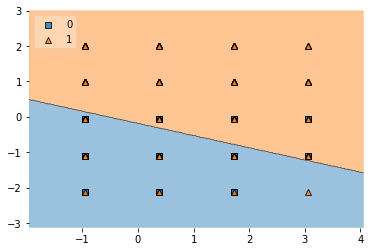

In [98]:
plot_decision_regions(X_train,Y_train.values,clf=clf,legend=2)

In [99]:
import pickle

In [102]:
pickle.dump(clf,open('model.pkl','wb'))